In [68]:
# Import libraries for data manipulation
import pandas as pd
import numpy as np
import os
import cv2 as cv
from cv2.data import haarcascades
import matplotlib.pyplot as plt

In [69]:
# Get the dataset labels using the dataset folder
labels = os.listdir('data/dataset')
labels

['Open', 'no_yawn', 'yawn', 'Closed']

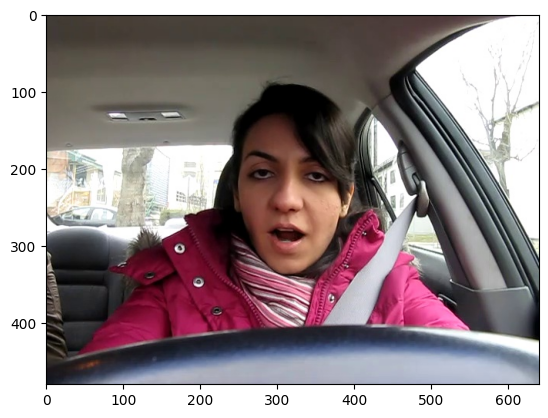

In [70]:
# Open random image from the dataset to see the image
plt.imshow(plt.imread('data/dataset/yawn/10.jpg'))
test_image = cv.imread('data/dataset/yawn/10.jpg')

In [71]:
# Load the cascade for the face detection using the haarcascades from OpenCV
face_cascade = haarcascades + "haarcascade_frontalface_default.xml"
face_cascade

'/home/rasooly/miniconda3/envs/ECS174Project/lib/python3.11/site-packages/cv2/data/haarcascade_frontalface_default.xml'

In [72]:
# Use the cascade to detect the face in the image using a CascadeClassifier
face_cascade_classifier = cv.CascadeClassifier(face_cascade)
face_cascade_classifier

< cv2.CascadeClassifier 0x7f063828e3b0>

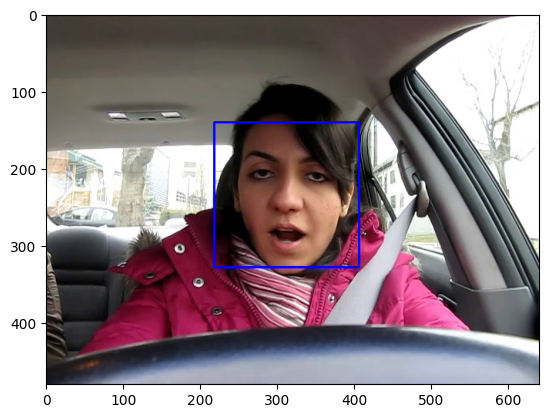

In [73]:
# Test on the test image we loaded earlier
gray_test_image = cv.cvtColor(test_image, cv.COLOR_BGR2GRAY)
faces = face_cascade_classifier.detectMultiScale(gray_test_image, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))

# Draw rectangles around the faces
for (x, y, w, h) in faces:
    cv.rectangle(test_image, (x, y), (x+w, y+h), (255, 0, 0), 2)
plt.imshow(cv.cvtColor(test_image, cv.COLOR_BGR2RGB))

In [86]:
# Define the image size for the model
IMAGE_SIZE = 175

face_yawn_images = []
face_no_yawn_images = []

# Define the function to detect the face in the images and resize them
def detect_face(image):
    gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)
    faces = face_cascade_classifier.detectMultiScale(gray_image, scaleFactor=1.3, minNeighbors=5, minSize=(30, 30))
    for (x, y, w, h) in faces:
        face = image[y:y+h, x:x+w]
        face = cv.resize(face, (IMAGE_SIZE, IMAGE_SIZE))
    return face if len(faces) > 0 else None

# Load the images from the dataset and detect the faces
yawn_images_labels = [labels[1], labels[2]]

for label in yawn_images_labels:
    for image in os.listdir(f'data/dataset/{label}'):
        img = cv.imread(f'data/dataset/{label}/{image}')
        face = detect_face(img)
        if face is None:
            continue
        if label == 'yawn':
            face_yawn_images.append(face)
        else:
            face_no_yawn_images.append(face)

# Check the number of images detected
len(face_yawn_images), len(face_no_yawn_images)

(242, 225)

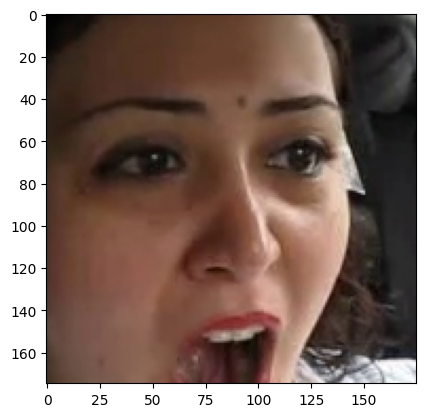

In [87]:
face = face_yawn_images[15]
plt.imshow(cv.cvtColor(face, cv.COLOR_BGR2RGB))